In [3]:
# NetCDF packages
import netCDF4
from netCDF4 import Dataset
import xarray
import xarray as xr

# Matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection, PolyCollection
%matplotlib inline

# Cartopy
import cartopy.feature
from cartopy.mpl.patch import geos_to_path
import cartopy.crs as ccrs

# MetPy packages
import metpy.calc as mpcalc
from metpy.testing import get_test_data
from metpy.units import units

# Scientific
import numpy as np
import pandas as pd

import itertools


In [22]:
ds = xr.open_dataset('../../salinity_4.nc',decode_times=False)
ds

<xarray.Dataset>
Dimensions:         (copy: 3, obs: 232323, qc_copy: 1)
Coordinates:
    time            (obs) float64 ...
    lon             (obs) float64 ...
    lat             (obs) float64 ...
    vertical        (obs) float64 ...
  * qc_copy         (qc_copy) int32 1
Dimensions without coordinates: copy, obs
Data variables:
    observations    (obs, copy) float64 ...
    error_variance  (obs) float64 ...
    qc              (obs, qc_copy) int32 ...
    obs_key         (obs) int32 ...
    list_of_groups  (obs) int32 ...
    Metadata        (obs) {'names':['instrument','manufacture'], 'formats':['<i4','i1'], 'offsets':[0,4], 'itemsize':8, 'aligned':True} ...
Attributes:
    featureType:    point
    title:          Restructured netCDF file from Nancy
    author:         Jason Ngo, SIParCS Intern
    source:         Nancy Collins, NCAR|UCAR
    conventions:    CF-1.7
    creation_date:  YYYY MM DD HH MM SS = 2019 06 30 16 05 57

In [3]:
lon, lat, vert, time = ds['lon'].values, ds['lat'].values, ds['vertical'].values, ds['time'].values
observation = ds['observation'].values

In [5]:
def geo_3d_plot(ds_subset, selected_var, group):
    fig = plt.figure()
    ax = Axes3D(fig, xlim=[-180, 180], ylim=[-90, 90])
    ax.set_zlim(bottom=0)

    def concat(iterable): return list(
        itertools.chain.from_iterable(iterable))

    target_projection = ccrs.PlateCarree()

    feature = cartopy.feature.NaturalEarthFeature(
        'physical', 'land', '110m')
    geoms = feature.geometries()

    geoms = [target_projection.project_geometry(geom, feature.crs)
             for geom in geoms]

    paths = concat(geos_to_path(geom) for geom in geoms)

    COLOR = True
    if COLOR:
        polys = concat(path.to_polygons() for path in paths)
        lc = PolyCollection(polys, edgecolor='black',
                            facecolor='green', closed=False)
    else:
        segments = []
        for path in paths:
            vertices = [vertex for vertex, _ in path.iter_segments()]
            vertices = np.asarray(vertices)
            segments.append(vertices)
        lc = LineCollection(segments, color='black')

    sc = ax.scatter(
        ds_subset['lon'].values,
        ds_subset['lat'].values,
        ds_subset['vertical'].values,
        c=ds_subset[selected_var].values.T[0], s=1,
        alpha=0.5)
    plt.colorbar(sc)
    ax.add_collection3d(lc)
    ax.add_collection3d(sc)

    ax.set_xlabel('degrees_east')
    ax.set_ylabel('degrees_north')
    ax.set_zlabel('Height')

    plt.title("{} Data".format(selected_var.capitalize()))
    plt.show()

    self.debugContents.append("Scatter Plot 3D of {}".format(
        selected_var.capitalize()))


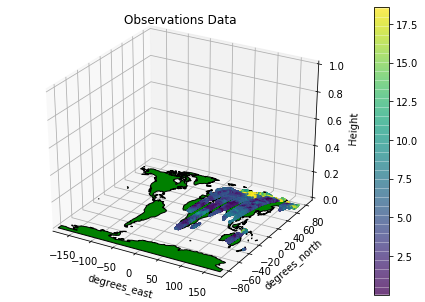

NameError: name 'self' is not defined

In [6]:
geo_3d_plot(ds, 'observations', 'root')

In [23]:
lat_max = np.Inf
ds_temp = ds.where(
            lat_max >= ds.coords['lat'].astype('float'), drop=True)
ds_temp

TypeError: invalid type promotion

In [11]:
ds.coords['lat'].values

array([75.81256866, 75.81256866, 75.81256866, ...,  3.81572914,
        3.81572914,  3.53271937])

In [14]:
print(np.Inf)

inf


In [18]:
import sys
sys.executable

'/anaconda3/bin/python'

In [19]:
print(sys.path)


['/Users/jngo/netCDF-GUI/tests/jupyter_tests', '/anaconda3/lib/python37.zip', '/anaconda3/lib/python3.7', '/anaconda3/lib/python3.7/lib-dynload', '', '/anaconda3/lib/python3.7/site-packages', '/anaconda3/lib/python3.7/site-packages/PyNIO', '/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/Users/jngo/.ipython']


In [25]:
ds['lon']

<xarray.DataArray 'lon' (obs: 232323)>
[232323 values with dtype=float64]
Coordinates:
    time      (obs) float64 ...
    lon       (obs) float64 ...
    lat       (obs) float64 75.81 75.81 75.81 75.81 ... 4.099 3.816 3.816 3.533
    vertical  (obs) float64 ...
Dimensions without coordinates: obs
Attributes:
    standard_name:  longitude
    long_name:      longitude of the observation
    units:          degrees_east

In [26]:
da = Dataset("../../salinity_4.nc", "r", format="NETCDF4")

In [27]:
da

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    featureType: point
    title: Restructured netCDF file from Nancy
    author: Jason Ngo, SIParCS Intern
    source: Nancy Collins, NCAR|UCAR
    conventions: CF-1.7
    creation_date: YYYY MM DD HH MM SS = 2019 06 30 16 05 57
    dimensions(sizes): obs(232323), copy(3), qc_copy(1)
    variables(dimensions): float64 time(obs), float64 lon(obs), float64 lat(obs), float64 vertical(obs), float64 observations(obs,copy), float64 error_variance(obs), int32 qc(obs,qc_copy), int32 qc_copy(qc_copy), int32 obs_key(obs), int32 list_of_groups(obs), {'names':['instrument','manufacture'], 'formats':['<i4','i1'], 'offsets':[0,4], 'itemsize':8, 'aligned':True} Metadata(obs)
    groups: Orange, Apple, Purple

In [28]:
da.groups

OrderedDict([('Orange', <class 'netCDF4._netCDF4.Group'>
              group /Orange:
                  dimensions(sizes): 
                  variables(dimensions): int32 obs_id(obs)
                  groups: ), ('Apple', <class 'netCDF4._netCDF4.Group'>
              group /Apple:
                  dimensions(sizes): 
                  variables(dimensions): int32 obs_id(obs)
                  groups: ), ('Purple', <class 'netCDF4._netCDF4.Group'>
              group /Purple:
                  dimensions(sizes): 
                  variables(dimensions): int32 obs_id(obs)
                  groups: )])

In [32]:
ds['obs'].values

array([     0,      1,      2, ..., 232320, 232321, 232322])